<h1>Multiple Supervised Classifiers Demonstration</h1>

In [ ]:
%%capture
#!pip install pandas_profiling

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
def DisplayConfusionMatrix(matrix):
    labels = ['True Neg','False Pos','False Neg','True Pos']
    accuracy  = np.trace(matrix) / float(np.sum(matrix))
    precision = matrix[1,1] / sum(matrix[:,1])
    specificity = matrix[0,0] / sum(matrix[0,:])
    recall    = matrix[1,1] / sum(matrix[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nSpecificity (TN Rate)={:0.3f}\nRecall (TP Rate)={:0.3f}\nF1 Score={:0.3f}".format(
    accuracy,precision,specificity,recall,f1_score)


    group_labels = ["{}\n".format(value) for value in labels]
    group_counts = ["{0:0.0f}\n".format(value) for value in matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(matrix.shape[0],matrix.shape[1])

    sns.set(font_scale = 2)
    ax = sns.heatmap(matrix, annot=box_labels, fmt='', cmap='Blues')
    _ = ax.set(xlabel='Predicted' + stats_text, ylabel='Truth', title='Confusion Matrix')    

In [ ]:
def DisplayFeatureImportances(model, X, y, scoring_function='accuracy'):
    
    results = permutation_importance(model, X, y, scoring=scoring_function)    
    importances = results.importances_mean
    
    print("Importance Scores")
    for i,score in enumerate(importances):
        print(f"Feature: {i}, Score: {score}")
    
    features = [x for x in range(len(importances))]
    
    importance_data = pd.DataFrame({'features':features, 'importances':importances})
    importance_data.columns = ['feature','importance']
    g = sns.catplot(data=importance_data, x='feature', y='importance', kind='bar', ci=None, height=5, aspect=1.5)
    g.set_axis_labels('Features', 'Importance Scores')
    return g
    

In [ ]:
def DisplayDecisionBoundaries(Xdata, ydata, clfType, clfParams={}, n_classes=2, featureIndexPairList=[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    color_options = "ryb"
    step_distance = 0.02
    f = plt.figure(figsize=(20,10))
    f.suptitle('Decision Boundaries', fontsize=16)
    
    for idx, feature_pair in enumerate(featureIndexPairList):
        # Fit classifier type (clfType) two features at a time
        X = Xdata[:, feature_pair]
        y = ydata
        
        # Train
        clf = clfType(**clfParams).fit(X, y)

        # Decision Boundary
        plt.subplot(2, 3, idx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, step_distance), np.arange(y_min, y_max, step_distance))
        
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel('feature_'+str(feature_pair[0]), fontsize=14)
        plt.ylabel('feature_'+str(feature_pair[1]), fontsize=14)

        # Data points
        for i, color in zip(range(n_classes), color_options):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label='feature_'+str(i), cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

<H3>Generate the sample data</H3>

In [ ]:
rng = np.random.RandomState(0)

X, y = make_classification(n_features=10, shuffle=False, n_samples=1000, random_state=rng)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rng)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1000, 10) (1000,)



(670, 10) (670,)



(330, 10) (330,)


In [ ]:
print(X[:1], y[:1])

[[-1.66853167 -1.29901346  0.79935284 -1.5599854  -3.11685659  0.64445203



  -1.91374267  0.66356158 -0.1540724   1.19361168]] [0]


<H3>Exploratory Data Analysis</H3>

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'label'], dtype='object')


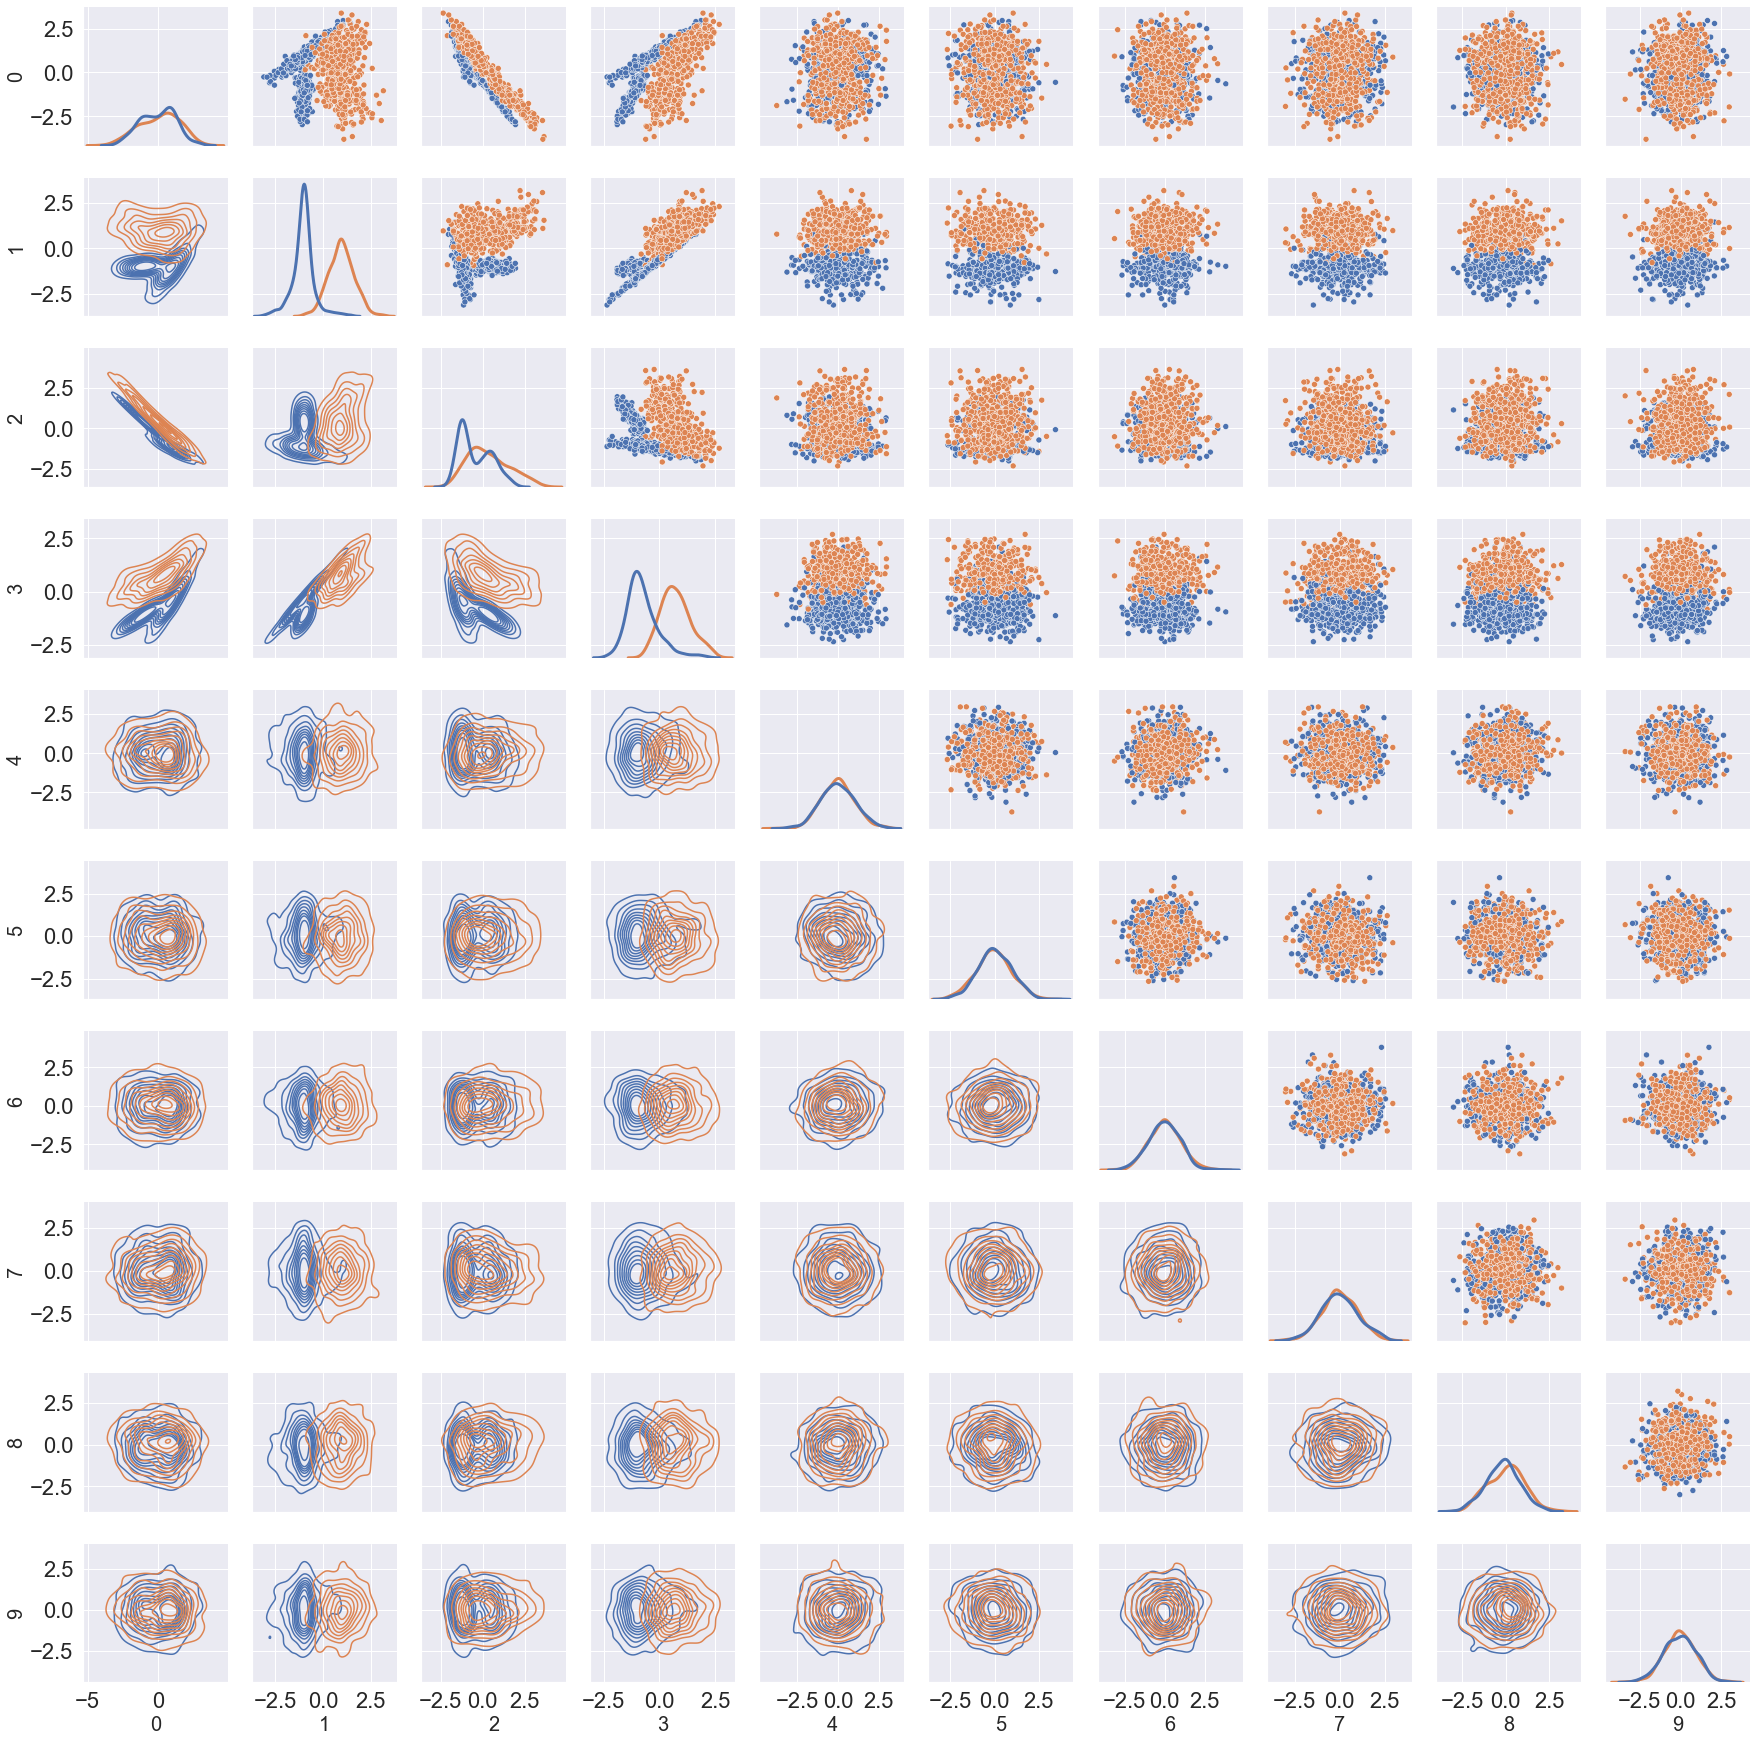

In [ ]:
data = pd.DataFrame(np.hstack((X,y.reshape(-1,1))))
data.columns = list(data.columns.astype(str))
data.rename(columns={'10':'label'}, inplace=True)
print(data.columns)
g = sns.PairGrid(data, hue='label')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
for i, axes_row in enumerate(g.axes):
    for j, axes_col in enumerate(axes_row):
        axes_col.set_xlabel(axes_col.get_xlabel(), fontsize=20)
        axes_col.set_ylabel(axes_col.get_ylabel(), fontsize=20)

In [ ]:
data.describe()

0            1            2            3            4  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.029168    -0.026570    -0.035264    -0.008423     0.001033   
std       1.327471     1.182997     1.166586     1.015775     1.019738   
min      -3.806020    -3.107342    -2.339154    -2.346431    -3.740101   
25%      -1.006694    -1.000162    -1.058573    -0.879891    -0.718861   
50%       0.185798    -0.100546    -0.157854     0.003162    -0.034455   
75%       0.987554     0.975560     0.686004     0.748515     0.673604   
max       3.378403     3.172533     3.646599     2.677722     2.956399   

                 5            6            7            8            9  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.001498     0.011288     0.010360    -0.062856    -0.034929   
std       0.969817     0.982169     0.998410     1.000452     0.974221   
min      -2.658387    -3.126201    -3.007437    -3.006499    -3.392300   
25%      -0.625571    -0.645757    -0.640222    -0.773899    -0.710671   
50%      -0.029388     0.004165    -0.041928    -0.026597    -0.024890   
75%       0.665059     0.663555     0.683871     0.637535     0.600317   
max       3.427539     3.801660     2.944984     3.211847     3.003123   

             label  
count  1000.000000  
mean      0.501000  
std       0.500249  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [ ]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(data, title="Profiling Report")
#profile.to_notebook_iframe()

<HR>

<H3>Classifier Exhibition</H3><HR>

<H4 style='background-color:#EEEE00'>SGDClassifier</H4>

Importance Scores



Feature: 0, Score: -0.0005970149253731405



Feature: 1, Score: 0.2570149253731343



Feature: 2, Score: 0.04507462686567163



Feature: 3, Score: 0.11432835820895523



Feature: 4, Score: -0.0008955223880596997



Feature: 5, Score: -0.0011940298507462587



Feature: 6, Score: 0.0011940298507462587



Feature: 7, Score: 0.0050746268656716165



Feature: 8, Score: 0.008059701492537296



Feature: 9, Score: 0.0035820895522387765


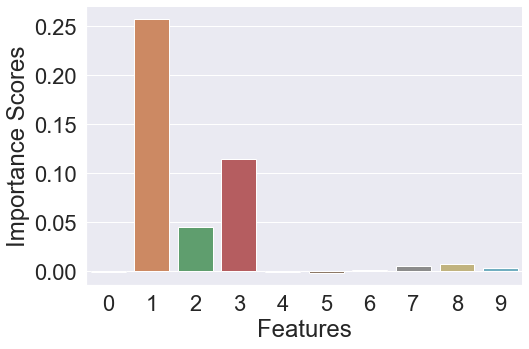

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
model = clf.fit(X_train, y_train)
y_predictions = model.predict(X_test)

DisplayFeatureImportances(model, X_train, y_train, 'accuracy')
display(HTML("<HR>"))

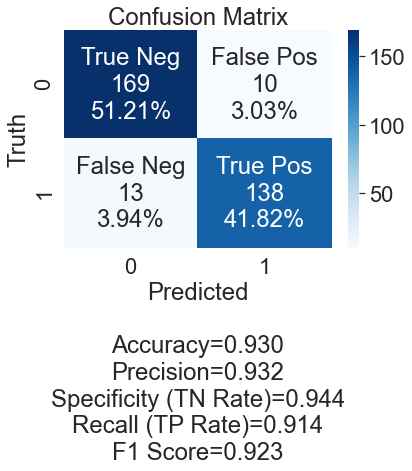

In [ ]:
perf_matrix = confusion_matrix(y_test, y_predictions)
DisplayConfusionMatrix(perf_matrix)

In [ ]:
pd.DataFrame(classification_report(y_test, y_predictions, output_dict=True)).T

precision    recall  f1-score     support
0              0.928571  0.944134  0.936288  179.000000
1              0.932432  0.913907  0.923077  151.000000
accuracy       0.930303  0.930303  0.930303    0.930303
macro avg      0.930502  0.929021  0.929683  330.000000
weighted avg   0.930338  0.930303  0.930243  330.000000

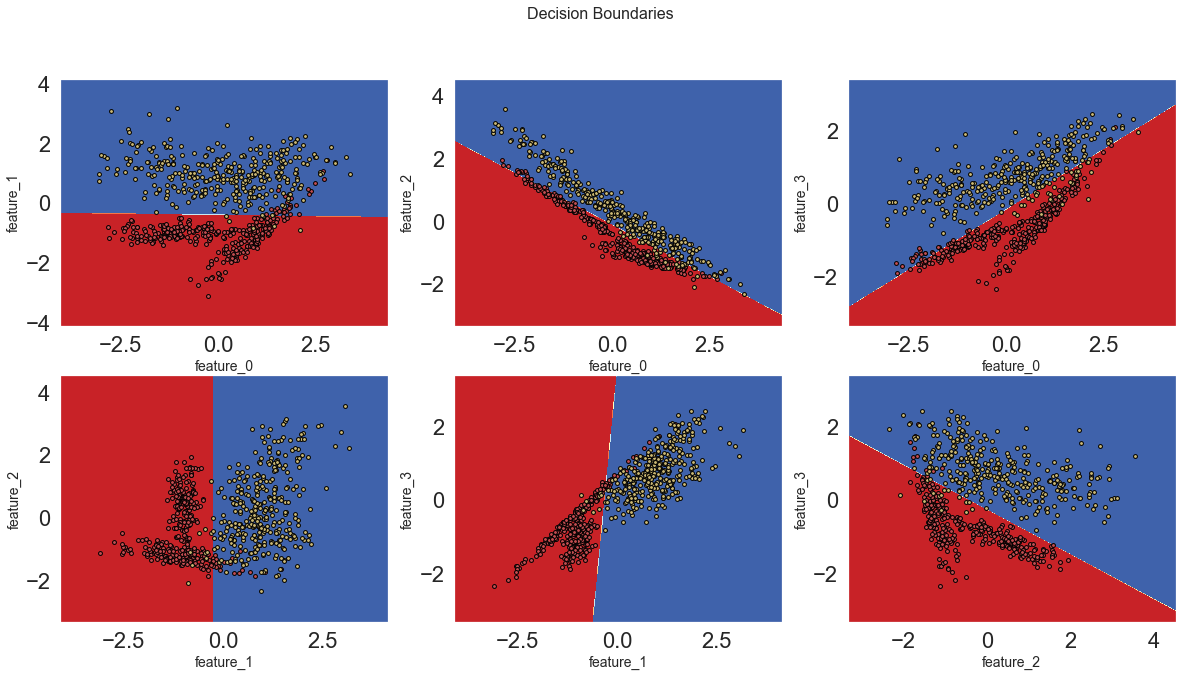

In [ ]:
DisplayDecisionBoundaries(X_train, y_train, type(clf))

<HR><H4 style='background-color:#EEEE00'>KNeighborsClassifier</H4>

Importance Scores



Feature: 0, Score: -0.0005970149253731405



Feature: 1, Score: 0.24388059701492537



Feature: 2, Score: 0.025671641791044798



Feature: 3, Score: 0.08149253731343284



Feature: 4, Score: 0.0014925373134328846



Feature: 5, Score: -0.0032835820895522174



Feature: 6, Score: -0.0008955223880596774



Feature: 7, Score: -0.0041791044776119165



Feature: 8, Score: -0.0026865671641790765



Feature: 9, Score: -0.004179104477611939


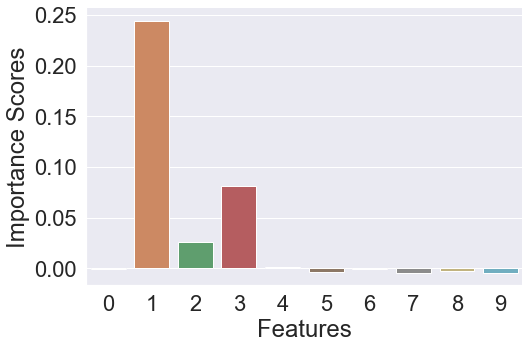

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
model = clf.fit(X_train, y_train)
y_predictions = model.predict(X_test)

DisplayFeatureImportances(model, X_train, y_train, 'accuracy')
display(HTML("<HR>"))

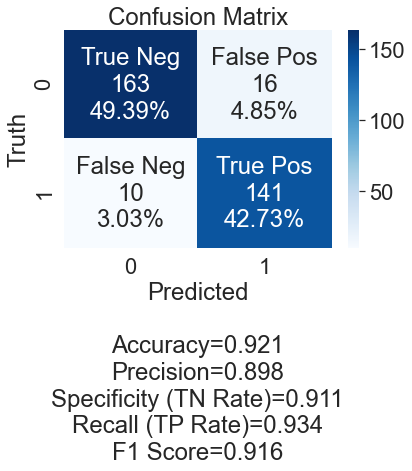

In [ ]:
perf_matrix = confusion_matrix(y_test, y_predictions)
DisplayConfusionMatrix(perf_matrix)

In [ ]:
pd.DataFrame(classification_report(y_test, y_predictions, output_dict=True)).T

precision    recall  f1-score     support
0              0.942197  0.910615  0.926136  179.000000
1              0.898089  0.933775  0.915584  151.000000
accuracy       0.921212  0.921212  0.921212    0.921212
macro avg      0.920143  0.922195  0.920860  330.000000
weighted avg   0.922014  0.921212  0.921308  330.000000

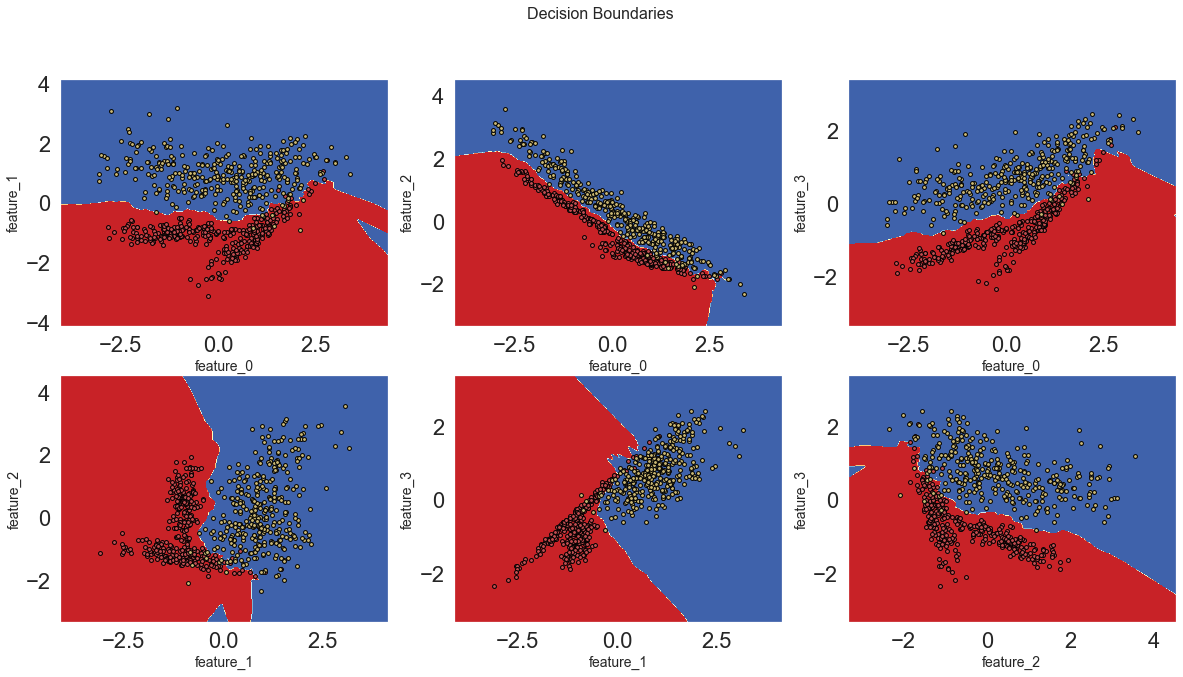

In [ ]:
DisplayDecisionBoundaries(X_train, y_train, type(clf))

<HR><H4 style='background-color:#EEEE00'>SVC</H4>

Importance Scores



Feature: 0, Score: 0.008358208955223856



Feature: 1, Score: 0.2967164179104477



Feature: 2, Score: 0.039701492537313386



Feature: 3, Score: 0.11373134328358206



Feature: 4, Score: 0.004477611940298498



Feature: 5, Score: 0.006865671641791038



Feature: 6, Score: 0.0041791044776119165



Feature: 7, Score: 0.0026865671641790765



Feature: 8, Score: 0.007462686567164156



Feature: 9, Score: 0.006865671641791038


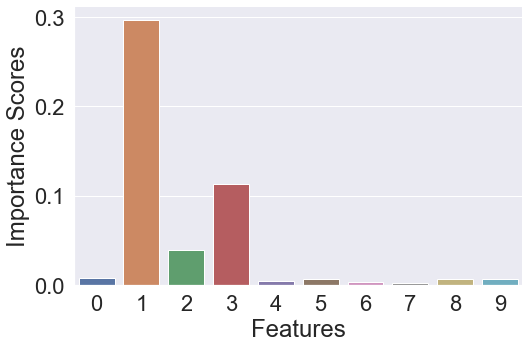

In [ ]:
from sklearn.svm import SVC
clf = SVC()
model = clf.fit(X_train, y_train)
y_predictions = model.predict(X_test)

DisplayFeatureImportances(model, X_train, y_train, 'accuracy')
display(HTML("<HR>"))

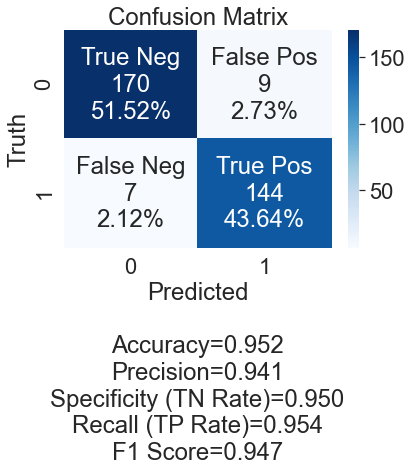

In [ ]:
perf_matrix = confusion_matrix(y_test, y_predictions)
DisplayConfusionMatrix(perf_matrix)

In [ ]:
pd.DataFrame(classification_report(y_test, y_predictions, output_dict=True)).T

precision    recall  f1-score     support
0              0.960452  0.949721  0.955056  179.000000
1              0.941176  0.953642  0.947368  151.000000
accuracy       0.951515  0.951515  0.951515    0.951515
macro avg      0.950814  0.951682  0.951212  330.000000
weighted avg   0.951632  0.951515  0.951538  330.000000

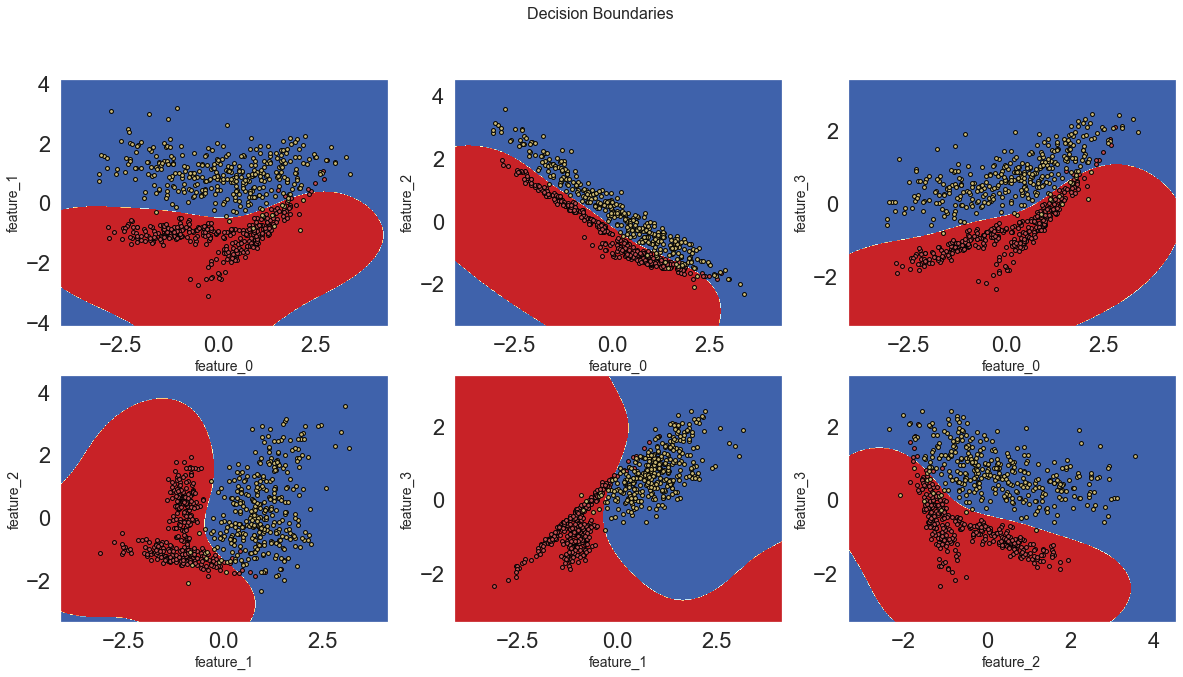

In [ ]:
DisplayDecisionBoundaries(X_train, y_train, type(clf))

<HR><H4 style='background-color:#EEEE00'>LogisticRegression</H4>

Importance Scores



Feature: 0, Score: 0.002089552238806003



Feature: 1, Score: 0.2994029850746269



Feature: 2, Score: 0.040895522388059734



Feature: 3, Score: 0.12179104477611946



Feature: 4, Score: 0.0



Feature: 5, Score: 0.0029850746268656803



Feature: 6, Score: 0.0017910447761194438



Feature: 7, Score: 0.0017910447761194214



Feature: 8, Score: 0.0029850746268657025



Feature: 9, Score: 0.002388059701492584


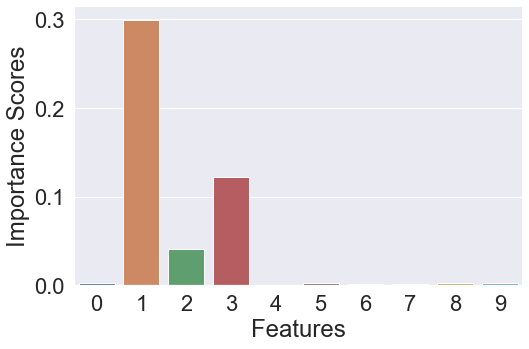

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
model = clf.fit(X_train, y_train)
y_predictions = model.predict(X_test)

DisplayFeatureImportances(model, X_train, y_train, 'accuracy')
display(HTML("<HR>"))

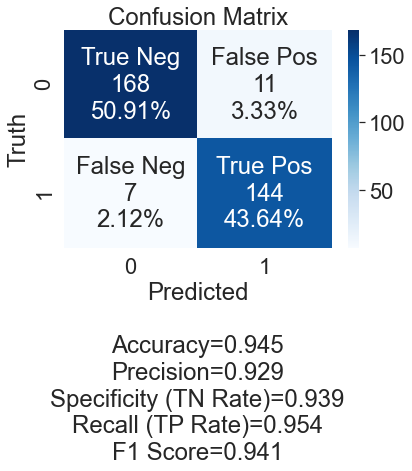

In [ ]:
perf_matrix = confusion_matrix(y_test, y_predictions)
DisplayConfusionMatrix(perf_matrix)

In [ ]:
pd.DataFrame(classification_report(y_test, y_predictions, output_dict=True)).T

precision    recall  f1-score     support
0              0.960000  0.938547  0.949153  179.000000
1              0.929032  0.953642  0.941176  151.000000
accuracy       0.945455  0.945455  0.945455    0.945455
macro avg      0.944516  0.946095  0.945165  330.000000
weighted avg   0.945830  0.945455  0.945503  330.000000

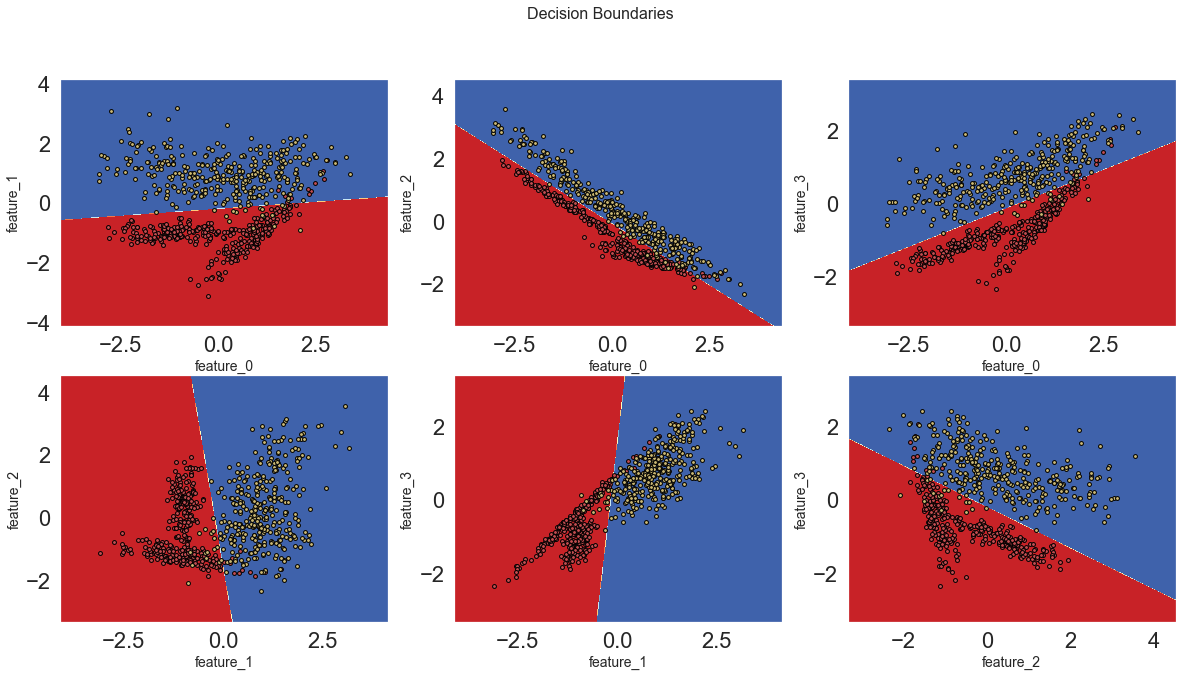

In [ ]:
DisplayDecisionBoundaries(X_train, y_train, type(clf))

<HR><H4 style='background-color:#EEEE00'>DecisionTreeClassifier</H4>

Importance Scores



Feature: 0, Score: 0.016716417910447756



Feature: 1, Score: 0.44716417910447764



Feature: 2, Score: 0.1



Feature: 3, Score: 0.0035820895522388208



Feature: 4, Score: 0.010447761194029858



Feature: 5, Score: 0.005373134328358198



Feature: 6, Score: 0.007462686567164178



Feature: 7, Score: 0.001791044776119377



Feature: 8, Score: 0.002686567164179121



Feature: 9, Score: 0.00238805970149254


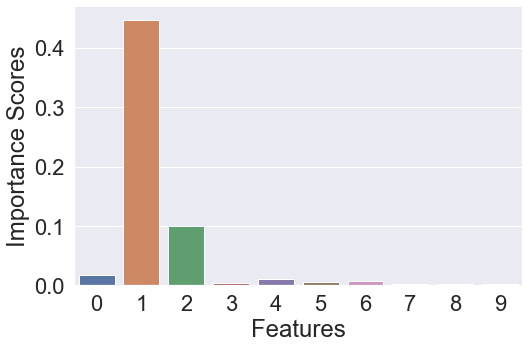

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
model = clf.fit(X_train, y_train)
y_predictions = model.predict(X_test)

DisplayFeatureImportances(model, X_train, y_train, 'accuracy')
display(HTML("<HR>"))

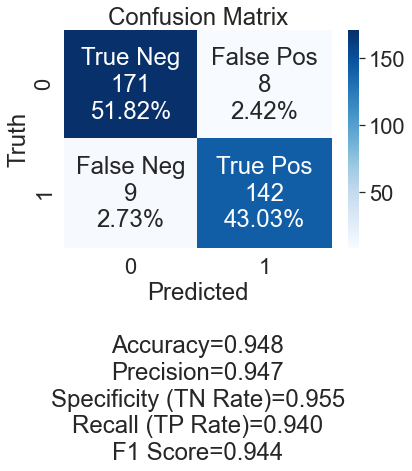

In [ ]:
perf_matrix = confusion_matrix(y_test, y_predictions)
DisplayConfusionMatrix(perf_matrix)

In [ ]:
pd.DataFrame(classification_report(y_test, y_predictions, output_dict=True)).T

precision    recall  f1-score     support
0              0.950000  0.955307  0.952646  179.000000
1              0.946667  0.940397  0.943522  151.000000
accuracy       0.948485  0.948485  0.948485    0.948485
macro avg      0.948333  0.947852  0.948084  330.000000
weighted avg   0.948475  0.948485  0.948471  330.000000

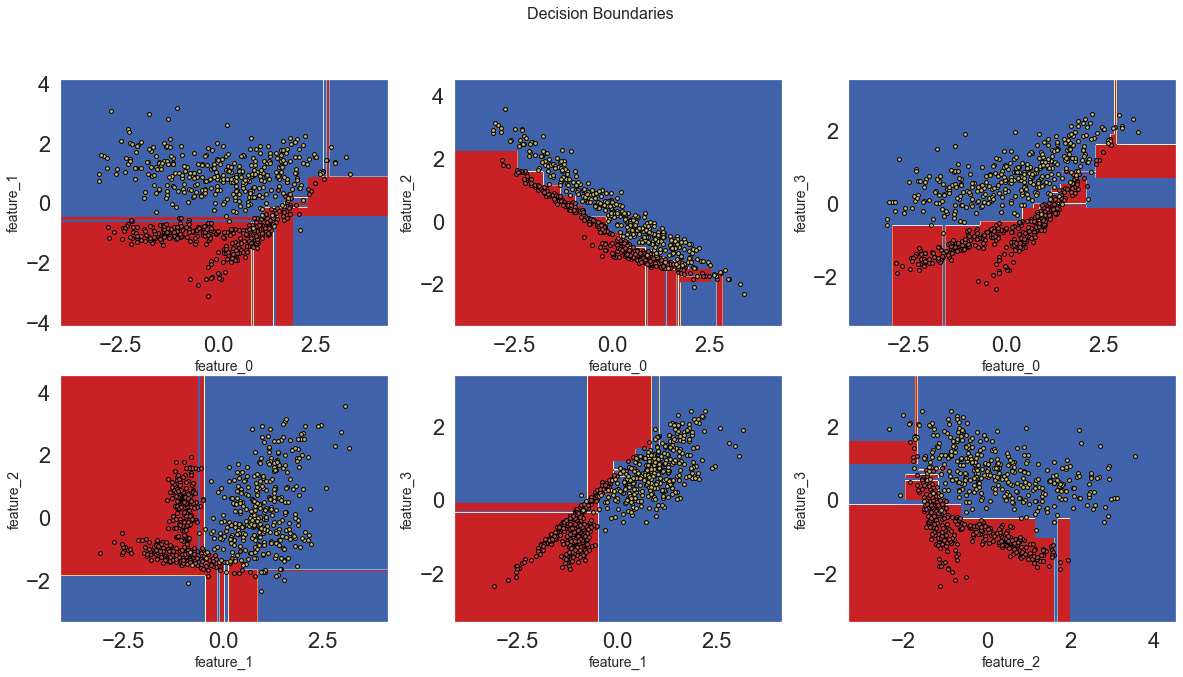

In [ ]:
DisplayDecisionBoundaries(X_train, y_train, type(clf))

<HR><H4 style='background-color:#EEEE00'>RandomForestClassifier</H4>

Importance Scores



Feature: 0, Score: 0.006268656716417876



Feature: 1, Score: 0.333134328358209



Feature: 2, Score: 0.036119402985074635



Feature: 3, Score: 0.09164179104477613



Feature: 4, Score: 0.0029850746268657025



Feature: 5, Score: 0.0011940298507462366



Feature: 6, Score: 0.0011940298507462366



Feature: 7, Score: 0.0011940298507462366



Feature: 8, Score: 0.002686567164179099



Feature: 9, Score: 0.00388059701492538


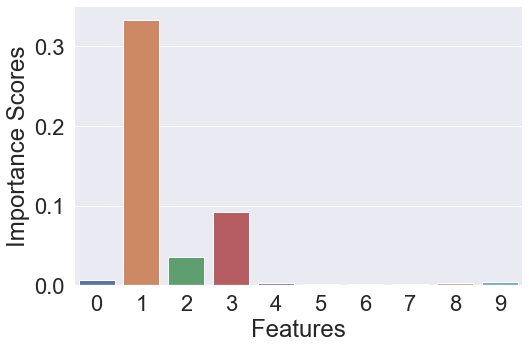

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model = clf.fit(X_train, y_train)
y_predictions = model.predict(X_test)

DisplayFeatureImportances(model, X_train, y_train, 'accuracy')
display(HTML("<HR>"))

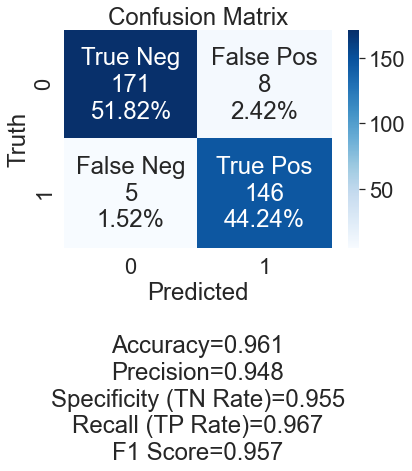

In [ ]:
perf_matrix = confusion_matrix(y_test, y_predictions)
DisplayConfusionMatrix(perf_matrix)

In [ ]:
pd.DataFrame(classification_report(y_test, y_predictions, output_dict=True)).T

precision    recall  f1-score     support
0              0.971591  0.955307  0.963380  179.000000
1              0.948052  0.966887  0.957377  151.000000
accuracy       0.960606  0.960606  0.960606    0.960606
macro avg      0.959821  0.961097  0.960379  330.000000
weighted avg   0.960820  0.960606  0.960633  330.000000

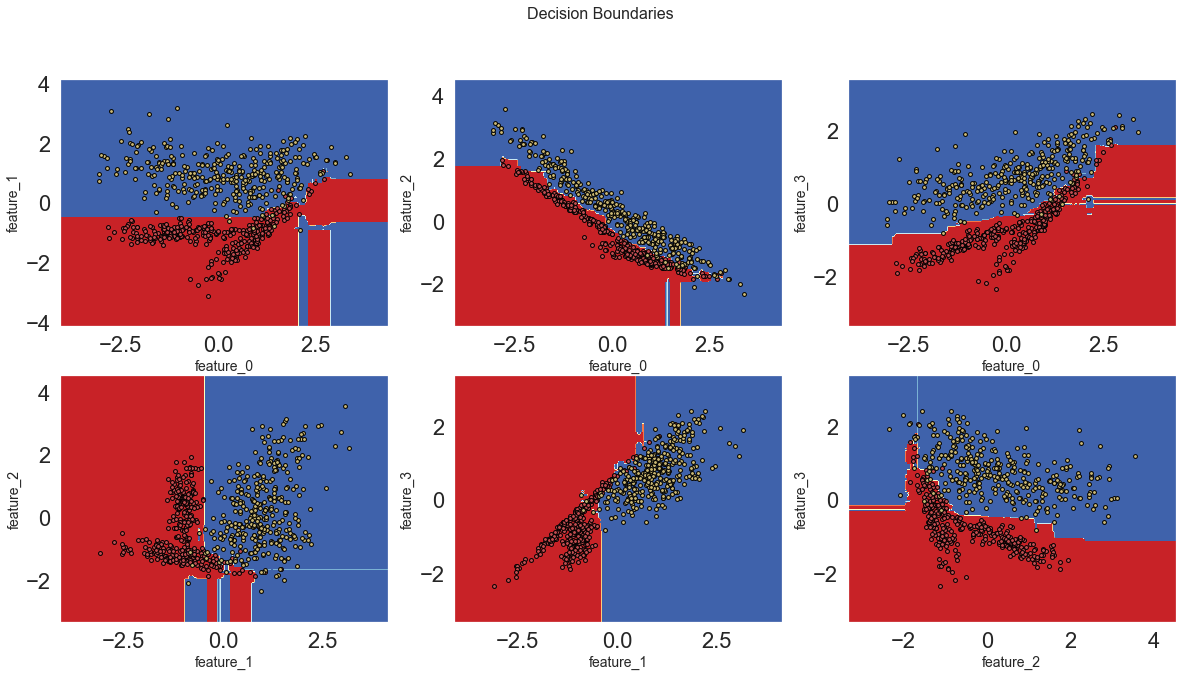

In [ ]:
DisplayDecisionBoundaries(X_train, y_train, type(clf))

<HR><H4 style='background-color:#EEEE00'>MultinomialNB</H4>

Importance Scores



Feature: 0, Score: 0.0017910447761194438



Feature: 1, Score: 0.16447761194029856



Feature: 2, Score: 0.012537313432835862



Feature: 3, Score: 0.1883582089552239



Feature: 4, Score: -0.0020895522388059582



Feature: 5, Score: 0.008358208955223944



Feature: 6, Score: 0.002089552238806003



Feature: 7, Score: -0.005373134328358198



Feature: 8, Score: -0.0029850746268656582



Feature: 9, Score: 0.003582089552238843


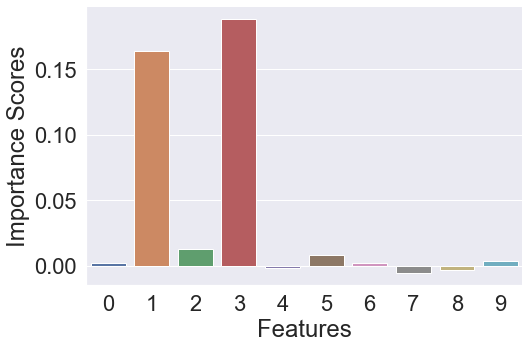

In [ ]:
# MultinomialNB does not work with negative feature variable values so transform them with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

clf = make_pipeline(MinMaxScaler(), MultinomialNB())
model = clf.fit(X_train, y_train)
y_predictions = model.predict(MinMaxScaler().fit_transform(X_test))

DisplayFeatureImportances(model, X_train, y_train, 'accuracy')
display(HTML("<HR>"))

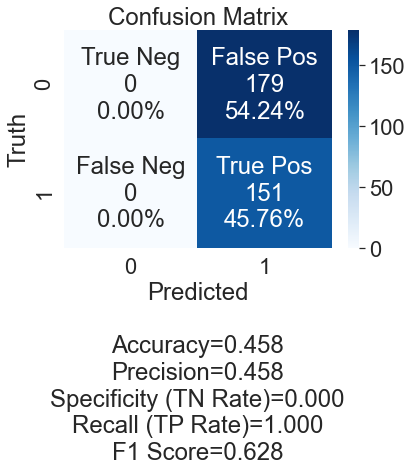

In [ ]:
perf_matrix = confusion_matrix(y_test, y_predictions)
DisplayConfusionMatrix(perf_matrix)

In [ ]:
pd.DataFrame(classification_report(y_test, y_predictions, output_dict=True)).T

precision    recall  f1-score     support
0              0.000000  0.000000  0.000000  179.000000
1              0.457576  1.000000  0.627859  151.000000
accuracy       0.457576  0.457576  0.457576    0.457576
macro avg      0.228788  0.500000  0.313929  330.000000
weighted avg   0.209376  0.457576  0.287293  330.000000

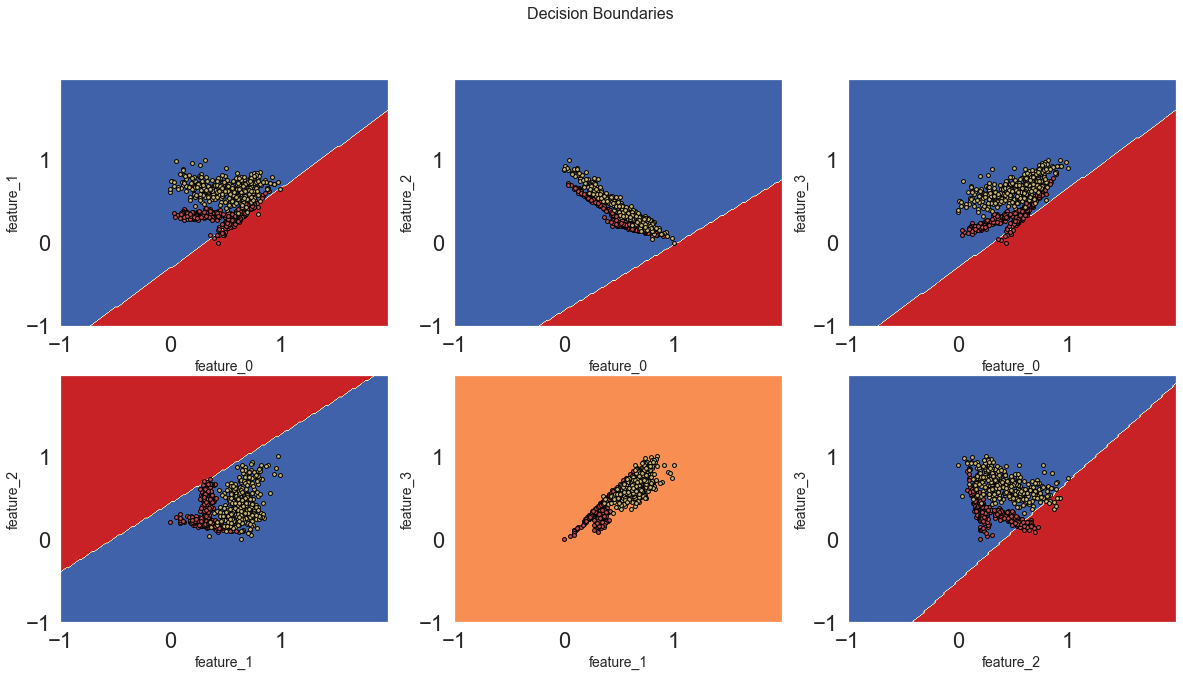

In [ ]:
DisplayDecisionBoundaries(MinMaxScaler().fit_transform(X_train), y_train, MultinomialNB)

<HR><H4 style='background-color:#EEEE00'>XGBClassifier</H4>

Importance Scores



Feature: 0, Score: 0.024477611940298516



Feature: 1, Score: 0.4976119402985075



Feature: 2, Score: 0.0167164179104478



Feature: 3, Score: 0.0



Feature: 4, Score: 0.0



Feature: 5, Score: 0.0



Feature: 6, Score: 0.00537313432835822



Feature: 7, Score: 0.002388059701492584



Feature: 8, Score: 0.00029850746268658137



Feature: 9, Score: 0.0


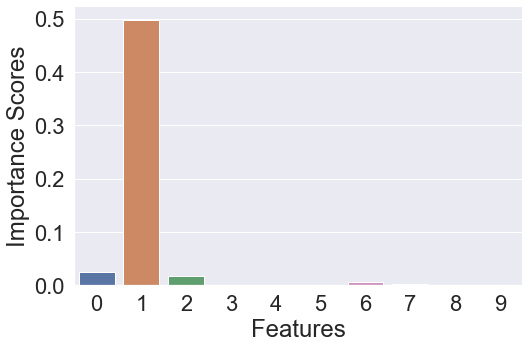

In [ ]:
from xgboost import XGBClassifier
params = {'max_depth':4, 'objective':'binary:logistic', 'eval_metric':'error', 'n_estimators':50, 'learning_rate':0.02 }

clf = XGBClassifier(**params)
model = clf.fit(X_train, y_train)
y_predictions = model.predict(X_test)

DisplayFeatureImportances(model, X_train, y_train, 'accuracy')
display(HTML("<HR>"))

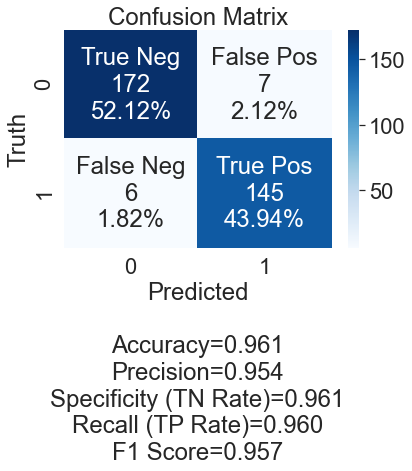

In [ ]:
perf_matrix = confusion_matrix(y_test, y_predictions)
DisplayConfusionMatrix(perf_matrix)

In [ ]:
pd.DataFrame(classification_report(y_test, y_predictions, output_dict=True)).T

precision    recall  f1-score     support
0              0.966292  0.960894  0.963585  179.000000
1              0.953947  0.960265  0.957096  151.000000
accuracy       0.960606  0.960606  0.960606    0.960606
macro avg      0.960120  0.960579  0.960341  330.000000
weighted avg   0.960643  0.960606  0.960616  330.000000

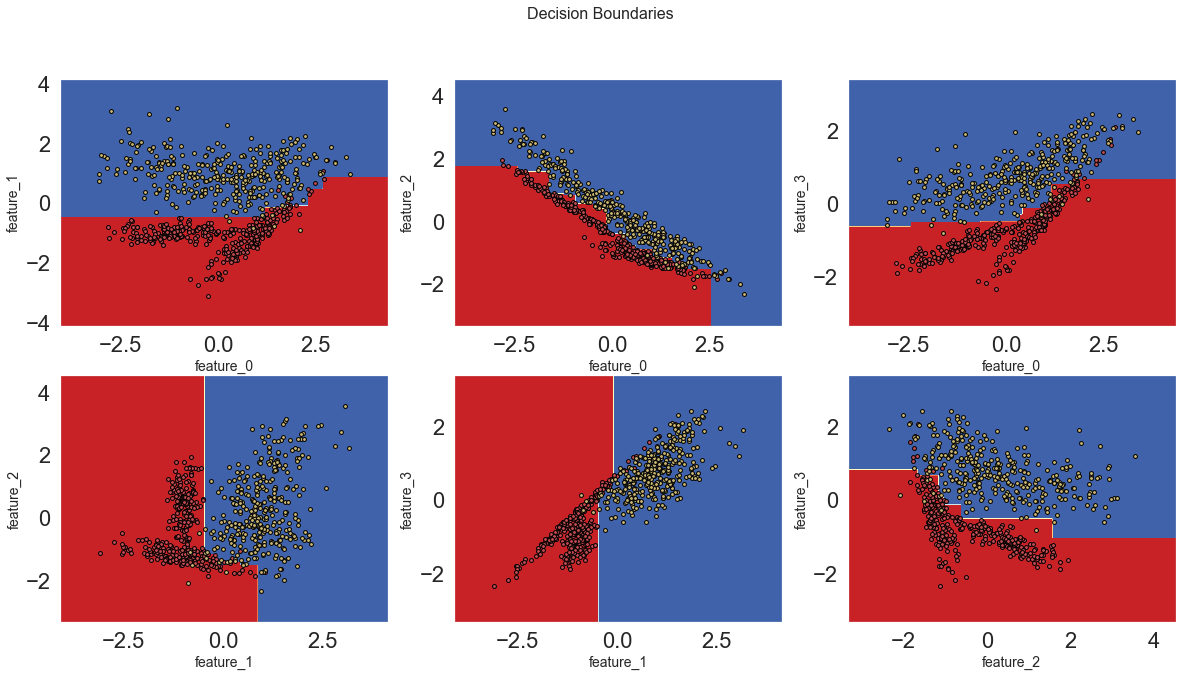

In [ ]:
DisplayDecisionBoundaries(X_train, y_train, type(clf), clfParams=params)

<HR><H4 style='background-color:#EEEE00'>PassiveAggressiveClassifier</H4>

Importance Scores



Feature: 0, Score: -0.005970149253731271



Feature: 1, Score: 0.24179104477611943



Feature: 2, Score: 0.030149253731343317



Feature: 3, Score: 0.12447761194029856



Feature: 4, Score: -0.008955223880596951



Feature: 5, Score: -0.005373134328358153



Feature: 6, Score: -0.006567164179104456



Feature: 7, Score: -0.003880597014925313



Feature: 8, Score: 0.0



Feature: 9, Score: -0.013731343283582054


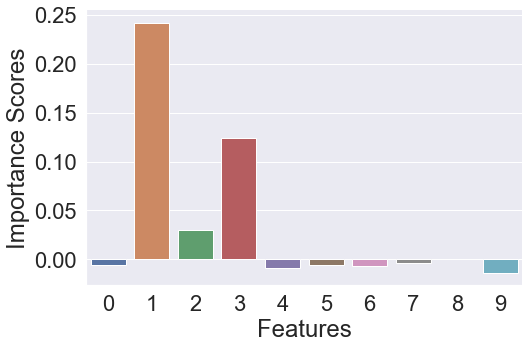

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier()
model = clf.fit(X_train, y_train)
y_predictions = model.predict(X_test)

DisplayFeatureImportances(model, X_train, y_train, 'accuracy')
display(HTML("<HR>"))

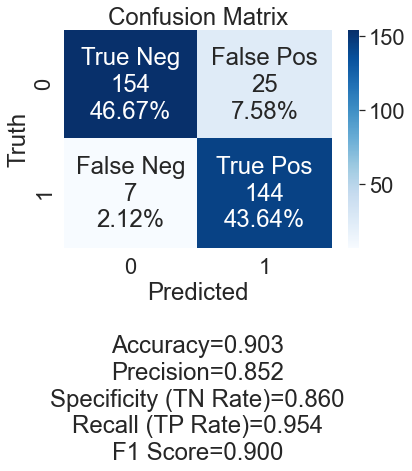

In [ ]:
perf_matrix = confusion_matrix(y_test, y_predictions)
DisplayConfusionMatrix(perf_matrix)

In [ ]:
pd.DataFrame(classification_report(y_test, y_predictions, output_dict=True)).T

precision    recall  f1-score    support
0              0.956522  0.860335  0.905882  179.00000
1              0.852071  0.953642  0.900000  151.00000
accuracy       0.903030  0.903030  0.903030    0.90303
macro avg      0.904296  0.906989  0.902941  330.00000
weighted avg   0.908728  0.903030  0.903191  330.00000

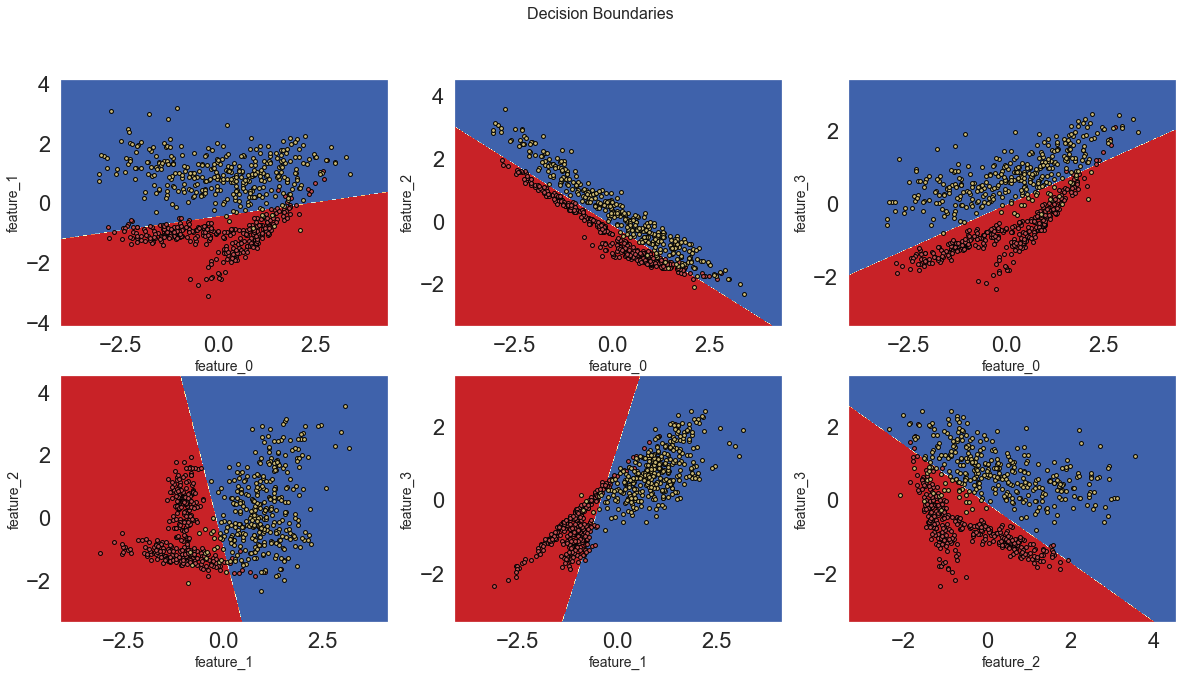

In [ ]:
DisplayDecisionBoundaries(X_train, y_train, type(clf))